In [341]:
import pickle
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
submission=pd.read_csv('data/sample_submission.csv')

In [342]:
train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
print(train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())
print('--------------')
      
print('Having a phone or not: ')
print(train['phone'].value_counts())
print('--------------')
      

print('Having a email or not: ')
print(train['email'].value_counts())
print('--------------')
      

print('Having a work phone or not: ')
print(train['work_phone'].value_counts())
print('--------------')

gender :
0    17697
1     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64
--------------
Having a phone or not: 
0    18672
1     7785
Name: phone, dtype: int64
--------------
Having a email or not: 
0    24042
1     2415
Name: email, dtype: int64
--------------
Having a work phone or not: 
0    20511
1     5946
Name: work_phone, dtype: int64
--------------


In [343]:
train.shape

(26457, 20)

In [344]:
test.shape

(10000, 19)

In [345]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  int64  
 2   car            26457 non-null  int64  
 3   reality        26457 non-null  int64  
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [346]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [347]:
test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [348]:
train = train.drop('index', axis=1)

In [349]:
test = test.drop('index', axis=1)
train.drop('occyp_type', axis = 1, inplace=True)
test.drop('occyp_type', axis = 1, inplace = True)

각 데이터 별로 DAYS_EMPLOYED 값을 살펴 보았을 때 일은 하고 있는 사람도 다수 있었기 때문에 결측치를 임의의 값으로 채우기 보다는 drop 해주었다.

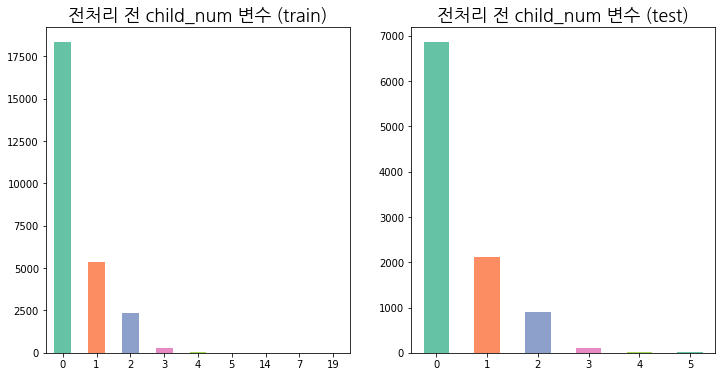

In [350]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

f, ax = plt.subplots(1, 2, figsize=(12, 6))
colors = sns.color_palette('Set2',5)
train["child_num"].value_counts().plot.bar(ax=ax[0],color=colors)
ax[0].set_title('전처리 전 child_num 변수 (train)', fontsize = 15,fontproperties=fontprop)
ax[0].tick_params (axis = 'x', labelrotation =0)
test["child_num"].value_counts().plot.bar(ax=ax[1],color=colors)
ax[1].set_title('전처리 전 child_num 변수 (test)', fontsize = 15,fontproperties=fontprop)
ax[1].tick_params (axis = 'x', labelrotation =0)

In [351]:
# 전처리
train.loc[train['child_num'] >= 2,'child_num']=2
test.loc[test['child_num']>=2, 'child_num']=2

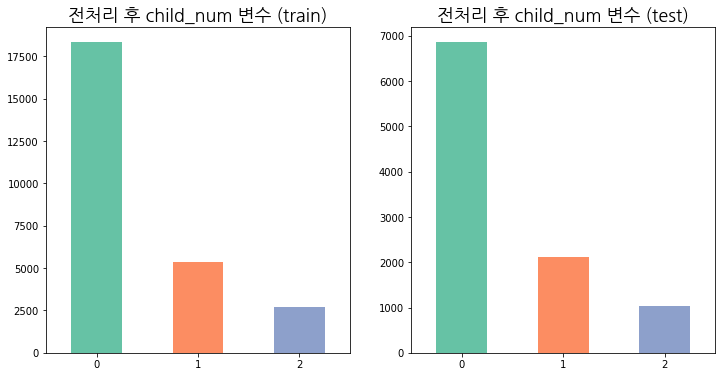

In [352]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

f, ax = plt.subplots(1, 2, figsize=(12, 6))
colors = sns.color_palette('Set2',3)
train["child_num"].value_counts().plot.bar(ax=ax[0],color=colors)
ax[0].set_title('전처리 후 child_num 변수 (train)', fontsize = 15,fontproperties=fontprop)
ax[0].tick_params (axis = 'x', labelrotation =0)
test["child_num"].value_counts().plot.bar(ax=ax[1],color=colors)
ax[1].set_title('전처리 후 child_num 변수 (test)', fontsize = 15,fontproperties=fontprop)
ax[1].tick_params (axis = 'x', labelrotation =0)

In [353]:
train.describe()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.331103,0.379748,0.673924,0.410024,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,0.470619,0.485333,0.468784,0.669604,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,1.000000,1.000000,1.000000,2.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [354]:
train['income_total'] = train['income_total'].astype(object)
train['income_total'] = train['income_total']/10000 
test['income_total'] = test['income_total']/10000
##############################################################3

(2.544, 18.18]      16212
(18.18, 33.66]       8330
(33.66, 49.14]       1530
(49.14, 64.62]        206
(64.62, 80.1]         121
(80.1, 95.58]          44
(95.58, 111.06]         3
(111.06, 126.54]        2
(126.54, 142.02]        4
(142.02, 157.5]         5
Name: income_total, dtype: int64


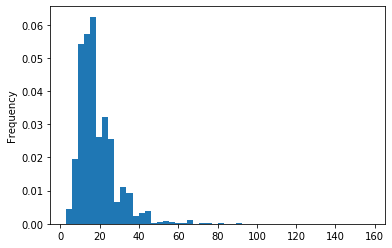

In [355]:
print(train['income_total'].value_counts(bins=10,sort=False))
train['income_total'].plot(kind='hist',bins=50,density=True)

In [356]:
count, bin_dividers =np.histogram(train['income_total'], bins=7)
bin_names=['소득'+str(i) for i in range(7) ]
#bin_dividers는 train기준!!
train['income_total']=pd.cut(x=train['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)
test['income_total']=pd.cut(x=test['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)

In [357]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,소득0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,0,0,1,1,소득0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,1,1,1,0,소득1,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,2.0,-22.0,2.0
3,0,0,1,0,소득0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,2.0,-37.0,0.0
4,0,1,1,0,소득0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,소득0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,4.0,-2.0,1.0
26453,0,0,1,1,소득0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,2.0,-47.0,2.0
26454,0,1,0,0,소득1,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,2.0,-25.0,2.0
26455,1,0,1,0,소득0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,1.0,-59.0,2.0


In [358]:
print(train['income_type'].unique())
print(train['edu_type'].unique())
print(train['family_type'].unique())
print(train['house_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [359]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['income_type']=label_encoder.fit_transform(train['income_type'])
test['income_type']=label_encoder.transform(test['income_type'])
########################################################################
train['edu_type']=label_encoder.fit_transform(train['edu_type'])
test['edu_type']=label_encoder.transform(test['edu_type'])
########################################################################
train['family_type']=label_encoder.fit_transform(train['family_type'])
test['family_type']=label_encoder.transform(test['family_type'])
########################################################################
train['house_type']=label_encoder.fit_transform(train['house_type'])
test['house_type']=label_encoder.transform(test['house_type'])
########################################################################
train['income_total']=label_encoder.fit_transform(train['income_total'])
test['income_total']=label_encoder.fit_transform(test['income_total'])
######################################################################

In [360]:
#minus 변경하고
#구간화 함수
def make_bin(variable, n):
    train[variable]=-train[variable]
    test[variable]=-test[variable]
    count, bin_dividers =np.histogram(train[variable], bins=n) #train의 구간화를 적용
    bin_names=[str(i) for i in range(n)]
    train[variable]=pd.cut(x=train[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable]=pd.cut(x=test[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable].fillna(str(0), inplace=True) #test에는 없는 것을 임의의 값으로 채움
    ##########################################################
    train[variable]=label_encoder.fit_transform(train[variable])
    test[variable]=label_encoder.transform(test[variable])

In [361]:
train.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'credit'],
      dtype='object')

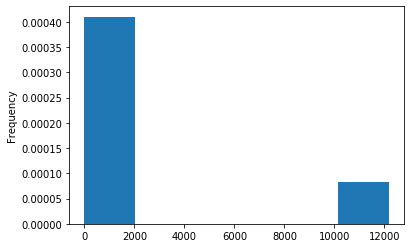

In [362]:
train['DAYS_EMPLOYED']= abs(train['DAYS_EMPLOYED']) / 30
test['DAYS_EMPLOYED']= abs(test['DAYS_EMPLOYED']) / 30
train['DAYS_EMPLOYED'].plot(kind='hist',bins=6,density=True)

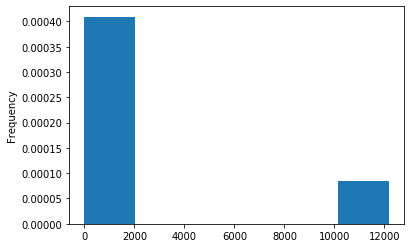

In [363]:
test['DAYS_EMPLOYED'].plot(kind='hist',bins=6,density=True)

In [364]:
Q1 = np.percentile(train['DAYS_EMPLOYED'], 25)

In [365]:
Q3  =np.percentile(train['DAYS_EMPLOYED'], 75)

In [366]:
train['DAYS_EMPLOYED'] = np.where(train['DAYS_EMPLOYED'] >= Q3, '01_high',
                                  np.where(train['DAYS_EMPLOYED'] >= Q1, '02_medium', '03_low'))

In [367]:
test['DAYS_EMPLOYED'] = np.where(test['DAYS_EMPLOYED'] >= Q3, '01_high',
                                  np.where(test['DAYS_EMPLOYED'] >= Q1, '02_medium', '03_low'))

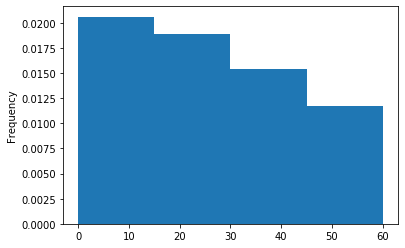

In [368]:
train['begin_month']= abs(train['begin_month'])
test['begin_month']= abs(test['begin_month'])
train['begin_month'].plot(kind='hist',bins=4,density=True)

In [369]:
make_bin('begin_month', n=4)

In [370]:
train['DAYS_BIRTH']= abs(train['DAYS_BIRTH'])/360
test['DAYS_BIRTH']= abs(test['DAYS_BIRTH'])/360

In [371]:
def get_category(age):
    cat = ''
    if age <= 19: cat = '10대'
    elif age <= 29: cat = '20대'
    elif age <= 39: cat = '30대'
    elif age <= 49: cat = '40대'
    elif age <= 59: cat = '50대'
    else: cat = '60대 이상'
        
    return cat

train['age_cat'] = train['DAYS_BIRTH'].apply(lambda x: get_category(x))
train.drop('DAYS_BIRTH', axis = 1, inplace = True)
test['age_cat'] = test['DAYS_BIRTH'].apply(lambda x: get_category(x))
test.drop('DAYS_BIRTH', axis = 1, inplace = True)

In [372]:
train['age_cat'].value_counts()

30대       7293
40대       7089
50대       5694
60대 이상    3787
20대       2594
Name: age_cat, dtype: int64

In [373]:
# 모두 휴대폰 소지하여서 불필요하다 판단하에 삭제
train.drop('FLAG_MOBIL', axis = 1, inplace = True)
test.drop('FLAG_MOBIL', axis = 1, inplace = True)

In [374]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,age_cat
0,0,0,0,0,0,0,1,1,2,02_medium,0,0,0,2.0,3,1.0,30대
1,0,0,1,1,0,0,4,0,1,02_medium,0,0,1,3.0,3,1.0,30대
2,1,1,1,0,1,4,1,1,1,02_medium,0,1,0,2.0,2,2.0,50대
3,0,0,1,0,0,0,4,1,1,02_medium,0,1,0,2.0,1,0.0,40대
4,0,1,1,0,0,2,1,1,1,02_medium,0,0,0,2.0,2,2.0,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,0,2,4,1,1,02_medium,0,0,0,4.0,3,1.0,30대
26453,0,0,1,1,0,4,1,2,1,02_medium,0,0,0,2.0,0,2.0,40대
26454,0,1,0,0,1,4,4,0,5,02_medium,0,0,0,2.0,2,2.0,20대
26455,1,0,1,0,0,4,2,3,1,03_low,0,0,0,1.0,0,2.0,20대


In [375]:
train['age_cat'] = label_encoder.fit_transform(train['age_cat'])
test['age_cat'] = label_encoder.fit_transform(test['age_cat'])
train['DAYS_EMPLOYED'] = label_encoder.fit_transform(train['DAYS_EMPLOYED'])
test['DAYS_EMPLOYED'] = label_encoder.fit_transform(test['DAYS_EMPLOYED'])

In [376]:
train['DAYS_EMPLOYED'].value_counts()

1    13208
0     6639
2     6610
Name: DAYS_EMPLOYED, dtype: int64

In [377]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,age_cat
0,0,0,0,0,0,0,1,1,2,1,0,0,0,2.0,3,1.0,1
1,0,0,1,1,0,0,4,0,1,1,0,0,1,3.0,3,1.0,1
2,1,1,1,0,1,4,1,1,1,1,0,1,0,2.0,2,2.0,3
3,0,0,1,0,0,0,4,1,1,1,0,1,0,2.0,1,0.0,2
4,0,1,1,0,0,2,1,1,1,1,0,0,0,2.0,2,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,0,2,4,1,1,1,0,0,0,4.0,3,1.0,1
26453,0,0,1,1,0,4,1,2,1,1,0,0,0,2.0,0,2.0,2
26454,0,1,0,0,1,4,4,0,5,1,0,0,0,2.0,2,2.0,0
26455,1,0,1,0,0,4,2,3,1,2,0,0,0,1.0,0,2.0,0


In [378]:
test

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,age_cat
0,1,1,0,0,0,1,4,0,1,0,0,1,0,2.0,0,4
1,0,0,1,0,0,2,1,1,1,0,0,1,0,2.0,1,3
2,0,0,1,0,0,4,4,1,1,2,1,1,0,2.0,1,2
3,1,1,0,0,0,0,4,1,1,1,1,0,0,2.0,1,3
4,0,1,1,0,0,2,1,1,1,0,1,0,0,2.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,0,0,4,2,1,1,1,1,1,0,2.0,2,3
9996,1,1,1,0,0,4,4,0,1,1,1,0,0,2.0,1,1
9997,0,0,1,0,1,4,4,1,1,0,0,0,0,2.0,0,3
9998,0,1,0,0,0,0,4,1,1,2,0,1,0,2.0,1,2


In [379]:
f = open("output/train_1.pkl", "wb")

pickle.dump(train, f)

f.close()

In [380]:
f = open("output/test_1.pkl", "wb")

pickle.dump(test, f)

f.close()

In [381]:
train = pd.read_pickle("output/train_1.pkl")

Text(0.5, 1, 'X 변수별 상관도 확인')

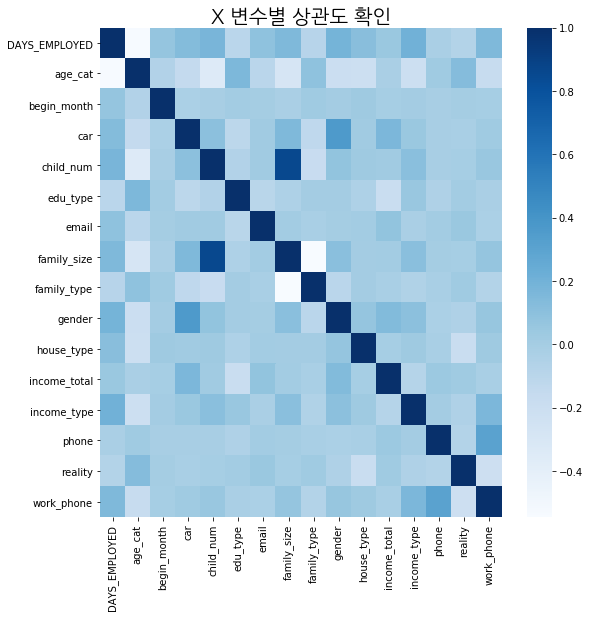

In [382]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(9,9))
corr = train[train.columns.difference(['credit'])].corr()
sns.heatmap(corr,cmap='Blues')
plt.title('X 변수별 상관도 확인',fontproperties=fontprop, fontsize = 20)

In [383]:
import statsmodels.api as sm
x_data = train.drop("credit", axis = 1)
target = train['credit']

x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 credit   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     28.31
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           1.69e-85
Time:                        15:58:05   Log-Likelihood:                -27965.
No. Observations:               26457   AIC:                         5.596e+04
Df Residuals:                   26440   BIC:                         5.610e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5577      0.042     37.436      0.000       1.476       1.639
gender            0.0058      0.010      0.580      0.562      -0.014       0.025
car               0.0091      0.010      0.938      0.348      -0.010       0.028
reality          -0.0220      0.010     -2.307      0.021      -0.041      -0.003
child_num        -0.0054      0.018     -0.305      0.760      -0.040       0.029
income_total     -0.0016      0.010     -0.166      0.868      -0.021       0.017
income_type      -0.0023      0.003     -0.872      0.383      -0.007       0.003
edu_type          0.0074      0.003      2.235      0.025       0.001       0.014
family_type       0.0059      0.007      0.793      0.428      -0.009       0.020
house_type       -0.0013      0.005     -0.274      0.784      -0.011       0.008
DAYS_EMPLOYED     0.0078      0.007      1.071      0.284      -0.006       0.022
work_phone       -0.0043      0.011     -0.379      0.705      -0.026       0.018
phone             0.0030      0.010      0.297      0.767      -0.017       0.022
email             0.0470      0.015      3.114      0.002       0.017       0.077
family_size       0.0168      0.015      1.121      0.262      -0.013       0.046
begin_month      -0.0794      0.004    -19.939      0.000      -0.087      -0.072
age_cat           0.0187      0.005      4.054      0.000       0.010       0.028
==============================================================================
Omnibus:                     3749.463   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5634.182
Skew:                          -1.130   Prob(JB):                         0.00
Kurtosis:                       2.983   Cond. No.                         63.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [384]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data1.values, i) for i in range(x_data1.shape[1])]
vif["features"] = x_data1.columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
0,94.410166,const
14,10.294460,family_size
4,7.710925,child_num
8,2.742595,family_type
16,1.691517,age_cat
10,1.456761,DAYS_EMPLOYED
11,1.218347,work_phone
1,1.216739,gender
2,1.205182,car
12,1.124729,phone


(상수항 제외) VIF 성능 확인 결과, family_size가 10이상이므로 삭제한다.

In [385]:
train.drop('family_size', axis = 1, inplace = True)
test.drop('family_size', axis = 1, inplace = True)

In [386]:
vif = pd.DataFrame()
x_data = train.drop("credit", axis = 1)
target = train['credit']

x_data2 = sm.add_constant(x_data, has_constant = "add")
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
0,32.675610,const
15,1.686936,age_cat
10,1.454757,DAYS_EMPLOYED
11,1.218248,work_phone
1,1.216486,gender
2,1.200893,car
4,1.171060,child_num
12,1.124713,phone
6,1.098199,income_type
3,1.089053,reality


전처리 완료

In [387]:
f = open("output/train_2.pkl", "wb")

pickle.dump(train, f)

f.close()

In [388]:
f = open("output/test_2.pkl", "wb")

pickle.dump(test, f)

f.close()